(10, 3)
solution:
1.625797 x + 3.539777 y + 1.717820 = z
errors: [[ 5.76451542]
 [ 8.4384059 ]
 [-5.04619356]
 [-5.28363393]
 [ 6.38545625]
 [-1.97730525]
 [-7.85558374]
 [-0.66373954]
 [ 1.30739741]
 [-1.06931897]]
residual: 16.35556339294945


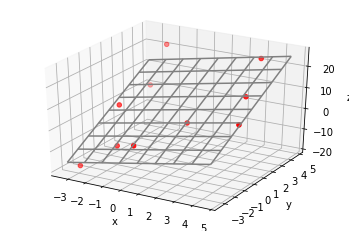

In [4]:
# https://stackoverflow.com/questions/12299540/plane-fitting-to-4-or-more-xyz-points

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

N_POINTS = 10
TARGET_X_SLOPE = 2
TARGET_y_SLOPE = 3
TARGET_OFFSET  = 5
EXTENTS = 5
NOISE = 5

# create random data
xs = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
zs = []
for i in range(N_POINTS):
    zs.append(xs[i]*TARGET_X_SLOPE + \
              ys[i]*TARGET_y_SLOPE + \
              TARGET_OFFSET + np.random.normal(scale=NOISE))

# plot raw data
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='r')

# do fit
tmp_A = []
tmp_b = []
for i in range(len(xs)):
    tmp_A.append([xs[i], ys[i], 1])
    tmp_b.append(zs[i])
    
#print(A.T*A)
#print((A.T*A).I)
#print('I:',(A.T*A).I*(A.T*A))
    
b = np.matrix(tmp_b).T
A = np.matrix(tmp_A)
#print(A.shape)
fit = (A.T * A).I * A.T * b
errors = b - A * fit
residual = np.linalg.norm(errors)

print ("solution:")
print ("%f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
print ("errors:",errors)
print ("residual:",residual)

# plot plane
xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                  np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
ax.plot_wireframe(X,Y,Z, color='grey')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

